# Casos confirmados de Covid-19

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima, ADFTest
#from pmdarima.arima import ADFTest
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#elemina os warnings das bibliotecas 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
print("*** IMPORTES FEITO COM SUCESSO***")

*** IMPORTES FEITO COM SUCESSO***


In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

urlretrieve(url, 'C:/Users/Rogerio Lopes/Desktop/Rogerio/dadosCovid/casosGlobalCovid.csv')

('C:/Users/Rogerio Lopes/Desktop/Rogerio/dadosCovid/casosGlobalCovid.csv',
 <http.client.HTTPMessage at 0x2614dbd5fd0>)

In [3]:
df_covid = pd.read_csv('casosGlobalCovid.csv') 

In [4]:
df_covid.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076


In [5]:
df_covid = df_covid.rename(columns = {'Country/Region':'Paises'})
df_covid

,Province/State,Paises,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,718963,728435,736972,746678,756689,766051,770640,779398,790755,797712
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,390369,392452,394683,395677,396746,398946,400649,402255,403716,405056
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,8789,8830,8861,8891,8934,8988,9016,9039,9067,9111
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,208676,208715,208778,208829,208857,208867,208912,209002,209046,209114


In [6]:
df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)
df_covid.head()

,Province/State,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191
1,NaN,Albania,0,0,0,0,0,0,0,0,...,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222
4,NaN,Angola,0,0,0,0,0,0,0,0,...,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076


In [7]:
df_pais = df_covid.groupby('Paises').sum()
df_pais

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21
Paises,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191
Albania,0,0,0,0,0,0,0,0,0,0,...,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778
Algeria,0,0,0,0,0,0,0,0,0,0,...,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517
Andorra,0,0,0,0,0,0,0,0,0,0,...,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222
Angola,0,0,0,0,0,0,0,0,0,0,...,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,718963,728435,736972,746678,756689,766051,770640,779398,790755,797712
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,390369,392452,394683,395677,396746,398946,400649,402255,403716,405056
Yemen,0,0,0,0,0,0,0,0,0,0,...,8789,8830,8861,8891,8934,8988,9016,9039,9067,9111


In [8]:
date = df_pais.loc['Brazil'].index
cases = df_pais.loc['Brazil'].values

In [10]:
date

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/22/21', '9/23/21', '9/24/21', '9/25/21', '9/26/21', '9/27/21',
       '9/28/21', '9/29/21', '9/30/21', '10/1/21'],
      dtype='object', length=619)

In [11]:
cases

array([       0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        1,
              1,        1,        2,        2,        2,        2,
              4,        4,       13,       13,       20,       25,
             31,       38,       52,      151,      151,      162,
            200,      321,      372,      621,      793,     1021,
           1546,     1924,     2247,     2554,     2985,     3417,
           3904,     4256,     4579,     5717,     6836,     8044,
           9056,    10360,    11130,    12161,    14034,    16170,
          18092,    19638,    20727,    22192,    23430,    25262,
          28320,    30425,    33682,    36658,    38654,    40

<BarContainer object of 619 artists>

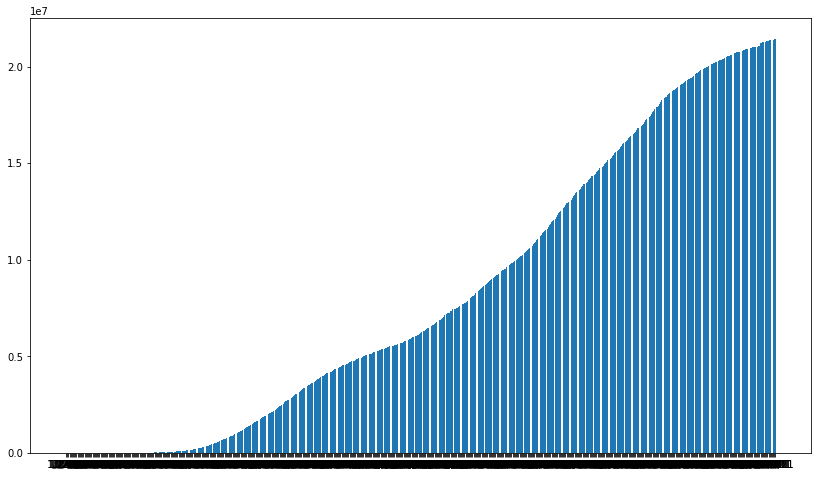

In [12]:
plt.figure(figsize=(14,8))
plt.bar(date, cases)

In [13]:
dados_Brasil = df_pais.loc['Brazil']

In [14]:
dados_Brasil

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
9/27/21    21366395
9/28/21    21381790
9/29/21    21399546
9/30/21    21427073
10/1/21    21445651
Name: Brazil, Length: 619, dtype: int64

# Eliminando números de caso "0"

In [15]:
dados_Brasil = dados_Brasil[dados_Brasil > 0]
dados_Brasil

2/26/20           1
2/27/20           1
2/28/20           1
2/29/20           2
3/1/20            2
             ...   
9/27/21    21366395
9/28/21    21381790
9/29/21    21399546
9/30/21    21427073
10/1/21    21445651
Name: Brazil, Length: 584, dtype: int64

In [16]:
dados_Brasil.index

Index(['2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20',
       '3/3/20', '3/4/20', '3/5/20', '3/6/20',
       ...
       '9/22/21', '9/23/21', '9/24/21', '9/25/21', '9/26/21', '9/27/21',
       '9/28/21', '9/29/21', '9/30/21', '10/1/21'],
      dtype='object', length=584)

In [17]:
dados_Brasil.values

array([       1,        1,        1,        2,        2,        2,
              2,        4,        4,       13,       13,       20,
             25,       31,       38,       52,      151,      151,
            162,      200,      321,      372,      621,      793,
           1021,     1546,     1924,     2247,     2554,     2985,
           3417,     3904,     4256,     4579,     5717,     6836,
           8044,     9056,    10360,    11130,    12161,    14034,
          16170,    18092,    19638,    20727,    22192,    23430,
          25262,    28320,    30425,    33682,    36658,    38654,
          40743,    43079,    45757,    50036,    54043,    59324,
          63100,    67446,    73235,    79685,    87187,    92202,
          97100,   101826,   108620,   115455,   126611,   135773,
         146894,   156061,   162699,   169594,   178214,   190137,
         203165,   220291,   233511,   241080,   255368,   271885,
         291579,   310087,   330890,   347398,   363211,   374

Text(0, 0.5, 'Valor em milhões')

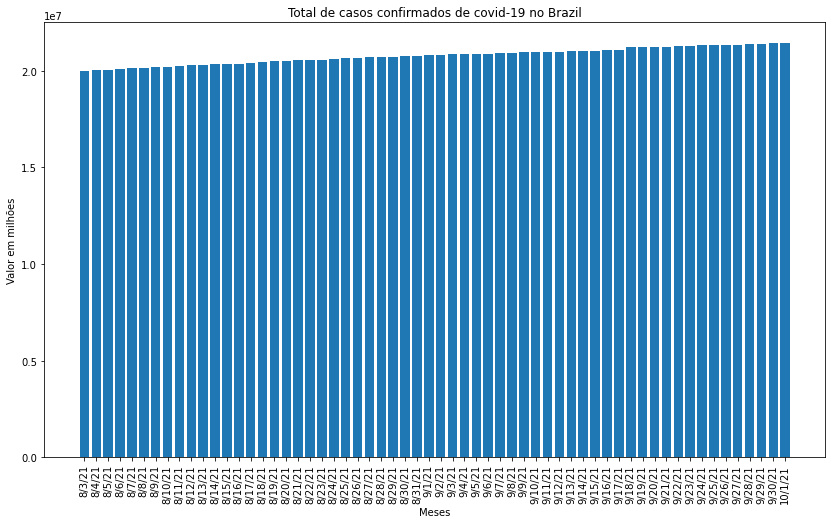

In [18]:
tam = len(dados_Brasil)

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.bar(dados_Brasil.index[tam-60:tam], dados_Brasil.values[tam-60:tam])
plt.title('Total de casos confirmados de covid-19 no Brazil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')

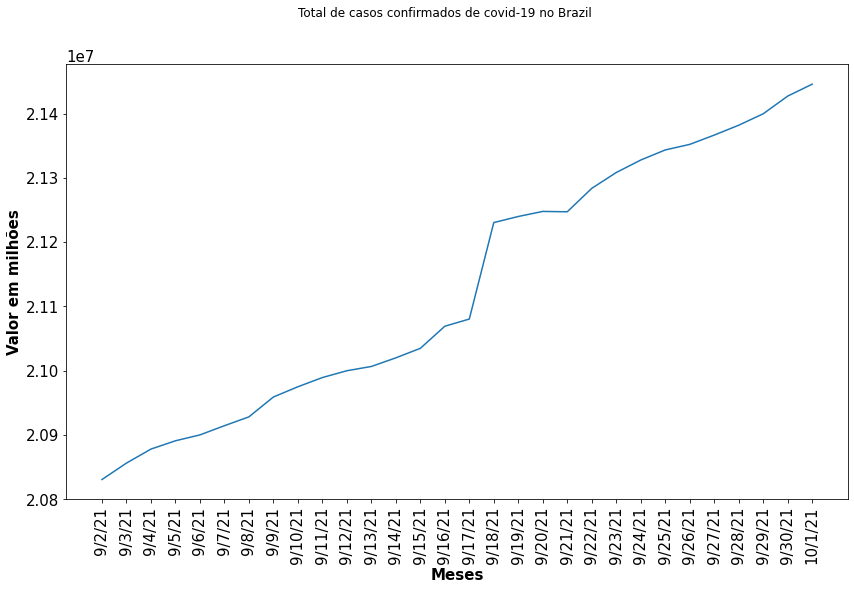

In [19]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.plot(dados_Brasil.index[tam-30:tam], dados_Brasil.values[tam-30:tam])
plt.suptitle('Total de casos confirmados de covid-19 no Brazil') #, fontweight='bold', fontsize=25)
plt.xlabel('Meses', fontweight='bold', fontsize=15)
plt.ylabel('Valor em milhões', fontweight='bold', fontsize=15)
plt.show()

# Nova analise com o métedo ARIMA
tendencia, sazonalidade e aleatoridade

In [20]:
dados_Brasil_dois = pd.DataFrame(dados_Brasil).rename_axis('data')
dados_Brasil_dois.head()

,Brazil
data,
2/26/20,1
2/27/20,1
2/28/20,1
2/29/20,2
3/1/20,2


In [21]:
dados_Brasil_dois.reset_index(level=0, inplace=True)
dados_Brasil_dois.head()

,data,Brazil
0,2/26/20,1
1,2/27/20,1
2,2/28/20,1
3,2/29/20,2
4,3/1/20,2


In [22]:
dados_Brasil_dois.isnull().sum()

data      0
Brazil    0
dtype: int64

In [23]:
print(dados_Brasil_dois.dtypes)

data      object
Brazil     int64
dtype: object


In [24]:
dados_Brasil_dois['data'] = pd.to_datetime(dados_Brasil_dois['data'])
dados_Brasil_dois.head()

,data,Brazil
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2


In [25]:
print(dados_Brasil_dois.dtypes)

data      datetime64[ns]
Brazil             int64
dtype: object


In [26]:
dados = dados_Brasil_dois.set_index('data')
dados.head()

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2


In [27]:
ts = dados_Brasil_dois['Brazil']
ts.head()

0    1
1    1
2    1
3    2
4    2
Name: Brazil, dtype: int64

- Depois de ter feito todos os paços a melhor opção é colocar tudo isso dentro de uma função para otimização de código

In [28]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    dados = dados['Brazil']
    return dados

In [29]:
ts = trans_data(dados_Brasil)
ts.head()

data
2020-02-26    1
2020-02-27    1
2020-02-28    1
2020-02-29    2
2020-03-01    2
Name: Brazil, dtype: int64

In [30]:
decomposicao = seasonal_decompose(ts)

In [31]:
#tendencia
tendencia = decomposicao.trend
tendencia

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29    1.571429e+00
2020-03-01    2.000000e+00
                  ...     
2021-09-27    2.137110e+07
2021-09-28    2.138796e+07
2021-09-29             NaN
2021-09-30             NaN
2021-10-01             NaN
Name: trend, Length: 584, dtype: float64

In [32]:
#sozonalidade
sazonal = decomposicao.seasonal
sazonal

data
2020-02-26    -3122.881731
2020-02-27     5346.893530
2020-02-28    11754.736736
2020-02-29    15186.696687
2020-03-01      534.095999
                  ...     
2021-09-27   -17184.570094
2021-09-28   -12514.971127
2021-09-29    -3122.881731
2021-09-30     5346.893530
2021-10-01    11754.736736
Name: seasonal, Length: 584, dtype: float64

In [33]:
#erro
aleatorio = decomposicao.resid
aleatorio

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29   -15186.268116
2020-03-01     -534.095999
                  ...     
2021-09-27    12480.141523
2021-09-28     6343.399698
2021-09-29             NaN
2021-09-30             NaN
2021-10-01             NaN
Name: resid, Length: 584, dtype: float64

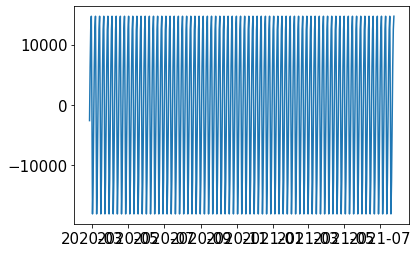

In [34]:
# Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)

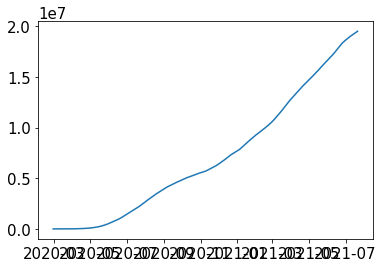

In [35]:
plt.plot(tendencia)

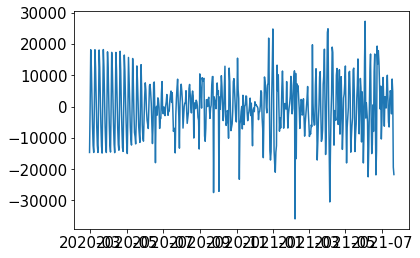

In [36]:
plt.plot(aleatorio)

- Ou podemos exibir tudo de uma unica vez

In [35]:
decomp = seasonal_decompose(ts,freq=20)

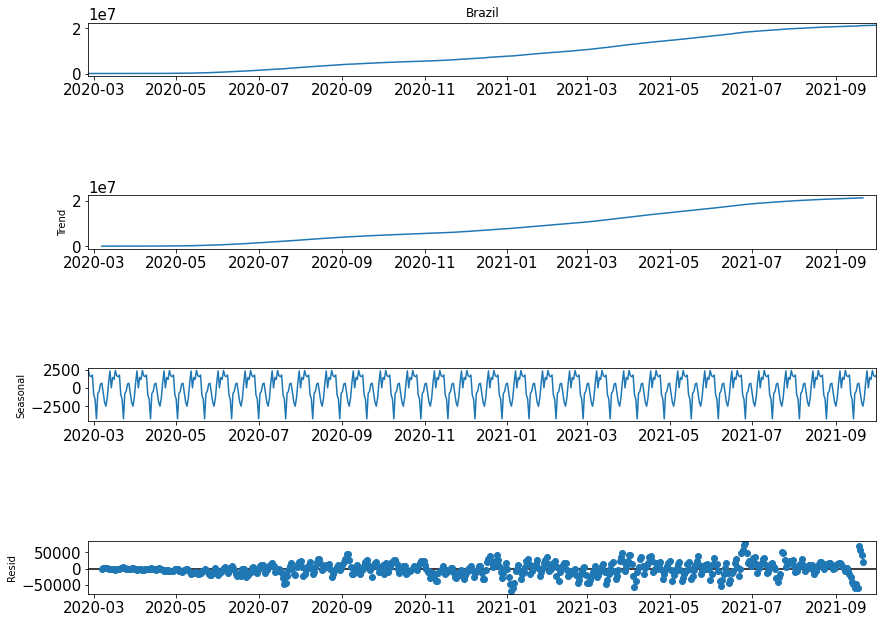

In [36]:
fig = decomp.plot()
fig.set_size_inches(15,10)

In [37]:
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Brazil   No. Observations:                  583
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6479.861
Method:                       css-mle   S.D. of innovations          16218.724
Date:                Sat, 02 Oct 2021   AIC                          12971.722
Time:                        17:19:10   BIC                          12997.931
Sample:                    02-27-2020   HQIC                         12981.938
                         - 10-01-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.678e+04   2.29e+04      1.609      0.108   -8024.246    8.16e+04
ar.L1.D.Brazil     1.0402      0.107      9.742      0.000       0.831       1.250
ar.L2.D.Brazil    -0.0435      0.106     -0.409      0.683      -0.252       0.165
ma.L1.D.Brazil    -0.6610      0.100     -6.641      0.000      -0.856      -0.466
ma.L2.D.Brazil    -0.2284      0.087     -2.615      0.009      -0.400      -0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0034           +0.0000j            1.0034            0.0000
AR.2           22.9269           +0.0000j           22.9269            0.0000
MA.1            1.0970           +0.0000j            1.0970            0.0000
MA.2           -3.9913           +0.0000j            3.9913            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
# Previsões de 10 datas no futuro
previsoes = modelo_treinado.forecast(steps = 10)[0]
previsoes

array([21466052.10767825, 21487856.07950983, 21509769.28789016,
       21531735.14693135, 21553751.02725467, 21575816.65344195,
       21597931.85328889, 21620096.45963255, 21642310.30606762,
       21664573.22675766])

Text(0, 0.5, 'Valor em milhões')

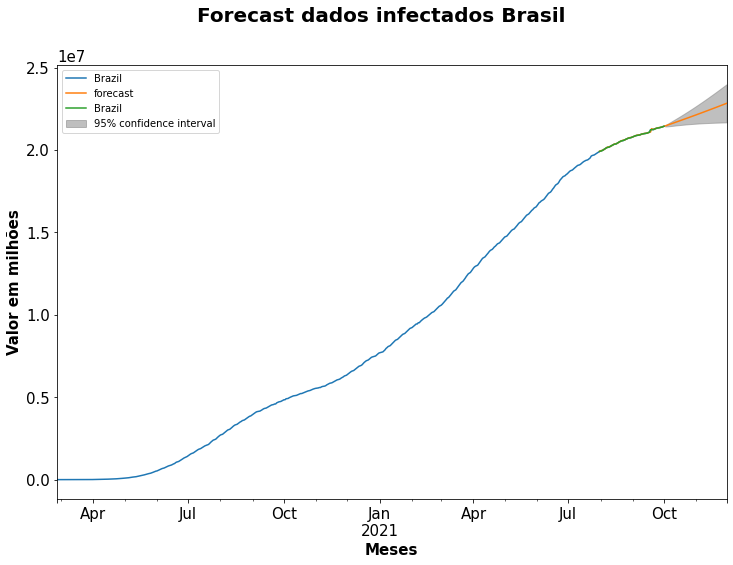

In [42]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot(figsize=(12, 8))
modelo_treinado.plot_predict('2021-07-31', '2021-11-30', ax = eixo, plot_insample = True)
plt.suptitle('Forecast dados infectados Brasil', fontweight='bold', fontsize=20)
plt.xlabel('Meses', fontweight='bold', fontsize=15)
plt.ylabel('Valor em milhões', fontweight='bold', fontsize=15)

- Podemos também incrementar ainda mais nossa função para ficar mais robusta

In [45]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    ts = dados['Brazil']
    adf_test = ADFTest(alpha = 0.05)
    adf_test.should_diff(ts)
    modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
    modelo_treinado = modelo.fit(disp=False)
    eixo = ts.plot(figsize=(12, 8))
    modelo_treinado.plot_predict('2021-01-31', '2021-11-30', ax = eixo, plot_insample = True)
    plt.suptitle('Forecast dados infectados Brasil', fontweight='bold', fontsize=20)
    plt.xlabel('Meses', fontweight='bold', fontsize=15)
    plt.ylabel('Valor em milhões', fontweight='bold', fontsize=15)
    return modelo_treinado

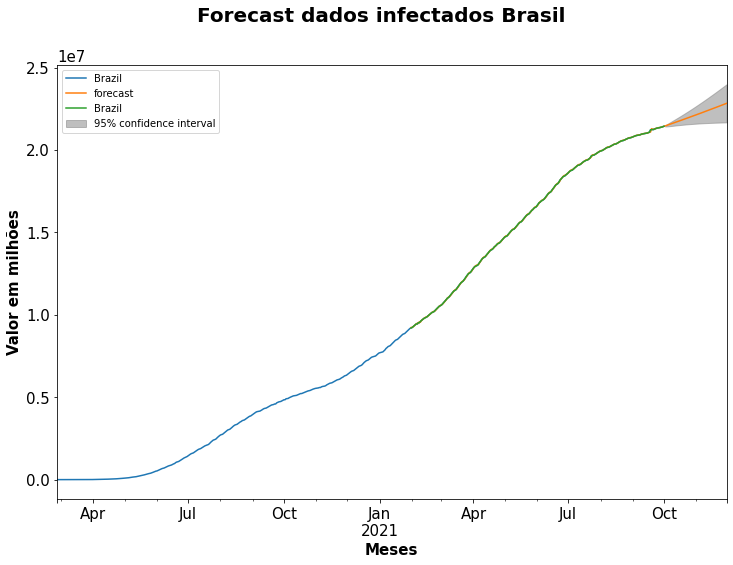

In [46]:
data = trans_data(dados_Brasil)
data

# Nova analise com o métedo auto_ARIMA

In [46]:
def autoArima(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    return dados

In [47]:
Brasil = autoArima(dados_Brasil)
Brasil

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2
...,...
2021-07-20,19419437
2021-07-21,19473954
2021-07-22,19523711


In [48]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(Brasil)

(0.49502141172146563, True)

In [49]:
Brasil.shape

(515, 1)

In [50]:
train = Brasil[:300]
test = Brasil[-215:]

In [51]:
train.tail()

,Brazil
data,
2020-12-17,7110434
2020-12-18,7162978
2020-12-19,7213155
2020-12-20,7238600
2020-12-21,7263619


In [52]:
test.head()

,Brazil
data,
2020-12-22,7318821
2020-12-23,7365517
2020-12-24,7423945
2020-12-25,7448560
2020-12-26,7465806


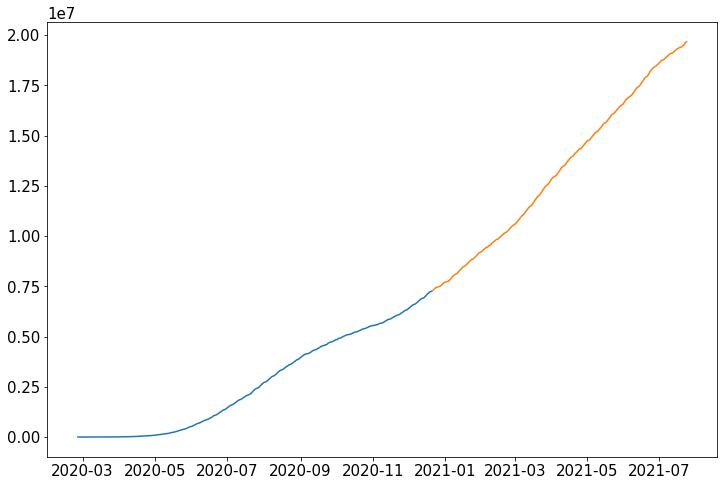

In [53]:
plt.figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test)

In [54]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6406.310, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6323.725, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6302.555, Time=0.25 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6382.119, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6302.095, Time=0.66 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6324.179, Time=0.44 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=6298.670, Time=0.79 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6298.228, Time=0.42 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=6297.322, Time=0.85 sec
 ARIMA(0,1,1)(4,1,0)[12]             : AIC=6295.597, Time=1.70 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=6296.631, Time=2.75 sec
 ARIMA(0,1,1)(4,1,1)[12]             : AIC=6297.313, Time=2.98 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=6298.227, Time=1.94 sec
 ARIMA(0,1,1)(5,1,1)[12]             : AIC=6293.091, Time=9.08 sec
 ARIMA(0,1,1)(5,1,2

In [55]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  300
Model:             SARIMAX(5, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -3079.221
Date:                              Sun, 25 Jul 2021   AIC                           6178.442
Time:                                      12:05:23   BIC                           6215.037
Sample:                                           0   HQIC                          6193.109
                                              - 300                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4689      0.138     10.660      0.000       1.199       1.739
ar.L2         -0.9426      0.249     -3.787      0.000      -1.430      -0.455
ar.L3          0.2613      0.297      0.878      0.380      -0.322       0.844
ar.L4         -0.2298      0.275     -0.835      0.404      -0.769       0.310
ar.L5          0.4422      0.144      3.076      0.002       0.160       0.724
ma.L1         -1.2733      0.094    -13.613      0.000      -1.457      -1.090
ma.L2          0.8666      0.089      9.714      0.000       0.692       1.041
ar.S.L12      -0.3153      0.167     -1.889      0.059      -0.642       0.012
ma.S.L12      -0.8021      0.104     -7.677      0.000      -1.007      -0.597
sigma2      2.242e+08   2.11e-09   1.06e+17      0.000    2.24e+08    2.24e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.86   Jarque-Bera (JB):               141.87
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):              15.63   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.79e+32. Standard errors may be unstable.
"""

In [57]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 215),index=test.index)
prediction.columns = ['brasil']
prediction.head()

,brasil
data,
2020-12-22,7.319092e+06
2020-12-23,7.377099e+06
2020-12-24,7.439496e+06
2020-12-25,7.495842e+06
2020-12-26,7.538765e+06


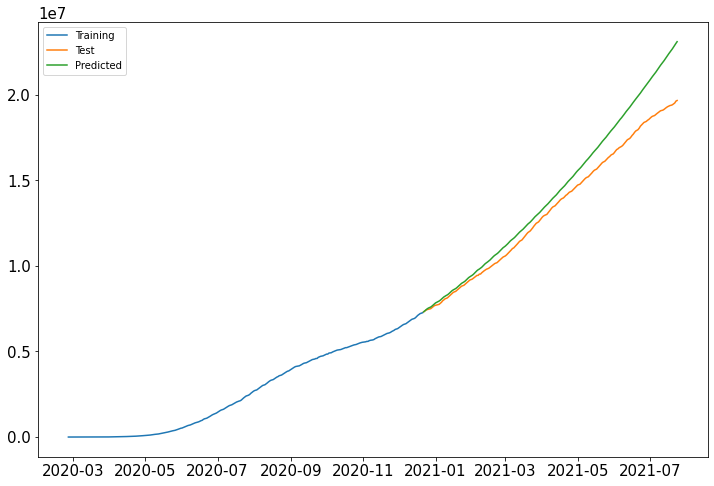

In [58]:
plt.figure(figsize=(12, 8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [59]:
from sklearn.metrics import r2_score
test['brasil'] = prediction
r2_score(test['Brazil'], test['brasil'])

0.8821532355516701

- Modelo mais simples

In [60]:
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  515
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -5523.904
Date:                Sun, 25 Jul 2021   AIC                          11063.808
Time:                        12:07:15   BIC                          11097.731
Sample:                             0   HQIC                         11077.105
                                - 515                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1442      0.040      3.630      0.000       0.066       0.222
ar.L2         -0.6000      0.029    -20.514      0.000      -0.657      -0.543
ar.L3         -0.3652      0.033    -11.044      0.000      -0.430      -0.300
ar.L4         -0.3567      0.036     -9.937      0.000      -0.427      -0.286
ar.L5         -0.4846      0.040    -12.039      0.000      -0.563      -0.406
ma.L1         -1.0154      0.039    -26.326      0.000      -1.091      -0.940
ma.L2          0.7226      0.038     19.160      0.000       0.649       0.797
sigma2      1.333e+08   1.87e-10   7.12e+17      0.000    1.33e+08    1.33e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):               573.36
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               8.09   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.98e+32. Standard errors may be unstable.
"""

In [61]:
# Visualização dos próximos 10 valores
proximos_10 = modelo_auto.predict(n_periods = 10)
proximos_10 

array([19702713.702059  , 19739871.85484392, 19788367.60407526,
       19834289.50764736, 19907557.38047823, 19983260.97555983,
       20037392.35560396, 20072387.59149318, 20108170.20915848,
       20149307.63369676])

# Reset para exportar dados

In [47]:
df_pais.reset_index()

,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191
1,Albania,0,0,0,0,0,0,0,0,0,...,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778
2,Algeria,0,0,0,0,0,0,0,0,0,...,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517
3,Andorra,0,0,0,0,0,0,0,0,0,...,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222
4,Angola,0,0,0,0,0,0,0,0,0,...,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,0,2,2,2,2,2,2,2,2,...,718963,728435,736972,746678,756689,766051,770640,779398,790755,797712
191,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,390369,392452,394683,395677,396746,398946,400649,402255,403716,405056
192,Yemen,0,0,0,0,0,0,0,0,0,...,8789,8830,8861,8891,8934,8988,9016,9039,9067,9111
193,Zambia,0,0,0,0,0,0,0,0,0,...,208676,208715,208778,208829,208857,208867,208912,209002,209046,209114


In [48]:
df_pais.to_csv('dadosCovidPaises.csv')